In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
!git clone https://github.com/rahulr0y/S4-Main-Project.git
!unzip ./S4-Main-Project/img/*.zip -d ./S4-Main-Project/img
path="./S4-Main-Project/img/"

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
from matplotlib.image import imread
#!pip install -q keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, ReLU, Dropout
from tensorflow.keras.utils import to_categorical

class_names = ['flute', 'viola', 'cello', 'oboe', 'trumpet', 'saxophone']
number_of_classes = len(class_names)

instruments = {'flute':1, 'viola':2, 'cello':3, 'oboe':4, 'trumpet':5, 'saxophone':6}

files = glob.glob('S4-Main-Project/img/*.png')
np.random.shuffle(files)

data, labels = [], []

loaded = 0

print('Number of samples {0}'.format(len(files)))

for file in files:
  img, name = imread(file), file.split('/')[-1].split('_')[0]
  data.append(rgb2grey(img))
  labels.append(instruments[name] - 1)

  loaded += 1
  if loaded % 200 == 0:
    print(loaded)

  if loaded == 5000:
    break

data, labels = np.array(data), np.array(labels)

s_60p, s_20p = int(len(data) * 0.6), int(len(data) * 0.2)

X_train, y_train = data[:s_60p], labels[:s_60p] #60%
X_validation, y_validation = data[s_60p: s_60p + s_20p], labels[s_60p: s_60p + s_20p]  #20%
X_test, y_test = data[s_60p + s_20p:], labels[s_60p + s_20p:] #20%

print(X_train.shape, X_test.shape)


Number of samples 600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:794: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  return rgb2gray(rgb)


200
400
600
(360, 540, 1080) (120, 540, 1080)


In [ ]:
print(X_validation.shape, y_validation.shape)

(120, 540, 1080) (120,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 540, 1080,1)
X_test = X_test.reshape(X_test.shape[0], 540, 1080, 1)
X_validation = X_validation.reshape(X_validation.shape[0], 540, 1080, 1)

print('Dataset has been loaded succesfully.')
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

print(to_categorical(y_train).shape)
print(to_categorical(y_validation).shape)
print(X_train.shape[1:])

epochs = 30

Dataset has been loaded succesfully.
(360, 540, 1080, 1) (360,)
(120, 540, 1080, 1) (120,)
(360, 6)
(120, 6)
(540, 1080, 1)


In [ ]:


model = Sequential([
        Conv2D(32, (3, 3), input_shape=(540, 1080, 1)),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(3, 3)),
        Dropout(0.25),

        Conv2D(64, (3,3), padding='same'),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(3, 3)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(128, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(3, 3)),
        Dropout(0.25),

        Flatten(),
        Dense(128),
        Activation('relu'),
        Dropout(0.5),
        Dense(number_of_classes),
        Activation('softmax')
    ])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

print('Fitting started...')
history = model.fit(X_train, to_categorical(y_train), epochs=epochs, validation_data=(X_validation, to_categorical(y_validation)))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 538, 1078, 32)     320       
                                                                 
 activation (Activation)     (None, 538, 1078, 32)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 536, 1076, 32)     9248      
                                                                 
 activation_1 (Activation)   (None, 536, 1076, 32)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 178, 358, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 178, 358, 32)      0         
                                                        

In [ ]:
import pickle

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/model/cnn.pkl', 'rb'))
model.summary()

In [ ]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open("history", 'w'))


hi = json.load(open("history", 'r'))

In [ ]:
print(hi['loss'][20])


0.15210360288619995


{'loss': [1.8352620601654053, 1.7369886636734009, 1.652949333190918, 1.629384994506836, 1.492729902267456, 1.2812690734863281, 0.9984570741653442, 0.8110697269439697, 0.7779820561408997, 0.7052377462387085, 0.4278896450996399, 0.3386267423629761, 0.32476216554641724, 0.26687392592430115, 0.23637641966342926, 0.23413380980491638, 0.18523487448692322, 0.15349701046943665, 0.18101410567760468, 0.14632372558116913, 0.15210360288619995, 0.09258027374744415, 0.09567767381668091, 0.10502146929502487, 0.07104437798261642, 0.08578210324048996, 0.16494031250476837, 0.15584805607795715, 0.1642756313085556, 0.12897808849811554], 'accuracy': [0.18888889253139496, 0.27222222089767456, 0.3444444537162781, 0.3194444477558136, 0.4027777910232544, 0.5222222208976746, 0.644444465637207, 0.7250000238418579, 0.7416666746139526, 0.7611111402511597, 0.8666666746139526, 0.8777777552604675, 0.8805555701255798, 0.9222221970558167, 0.9194444417953491, 0.9222221970558167, 0.9222221970558167, 0.9444444179534912, 0

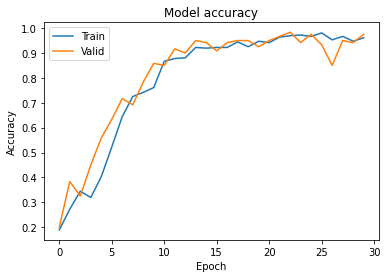

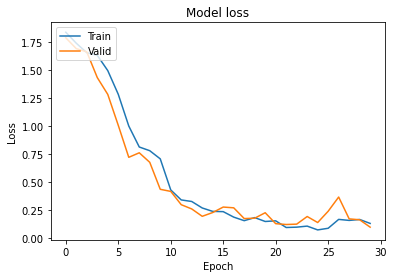

In [ ]:
#model accuracy
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, to_categorical(y_test), verbose=1)
print(scores)

4/4 [==============================] - 2s 363ms/step - loss: 0.1575 - accuracy: 0.9583
[0.15746483206748962, 0.9583333134651184]


In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
from matplotlib.image import imread
#!pip install -q keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, ReLU, Dropout
from tensorflow.keras.utils import to_categorical
from skimage.color import rgb2grey
from matplotlib.image import imread
import pandas as pd 
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


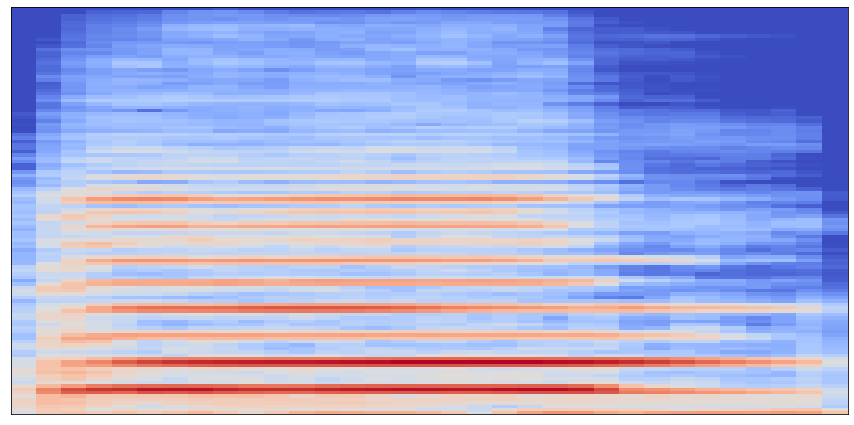

In [ ]:
f = 'cello.mp3'
aud, sr = librosa.load(f, duration=5)
mel_spectrogram = librosa.feature.melspectrogram(aud, sr=sr, n_fft=2048, hop_length=512, n_mels=120)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
fig, ax = plt.subplots(figsize=(15,7.5))
librosa.display.specshow(log_mel_spectrogram,sr=sr)
# plt.show()
# png_path = path + 'spectrograms/' + label + '/' 
fig.savefig('temp.png', transparent=True)

In [ ]:
img = imread('temp.png')
img = np.array(img)
img.shape

(540, 1080, 4)

In [ ]:

img = rgb2grey(img)
img = np.array(img)
img.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:794: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  return rgb2gray(rgb)


(540, 1080)

In [ ]:
img =img.reshape(1, 540, 1080, 1)

In [ ]:
k = model.predict(img)

In [ ]:
type(k)

numpy.ndarray

In [ ]:
k

array([[5.4228719e-04, 3.6918071e-01, 6.2949747e-01, 4.8539192e-07,
        4.1648323e-07, 7.7869854e-04]], dtype=float32)

In [ ]:
result = np.argmax(k)

In [ ]:
result

2

In [ ]:
class_names = ['flute', 'viola', 'cello', 'oboe', 'trumpet', 'saxophone']
class_names[result]

'cello'